# Portfolio Generation with Random Numbers

In this notebook, we will explore generating portfolios using randomization techniques in Python. The workflow is structured as follows:

1. **Random Asset Selection**: We will start by building portfolios by randomly selecting assets from a pool.
2. **Random Weight Allocation**: With a fixed set of assets, we will assign random weights to each, creating diversified portfolio configurations.
3. **Monte Carlo Simulations**: Finally, we will apply Monte Carlo simulations to model potential future prices for individual assets or entire portfolios, helping to assess risk and return.

This approach provides a foundation for understanding basic portfolio construction and risk assessment using randomization and simulation techniques.


In this case, we will work with approximately 500 assets and construct portfolios from them, with the main objective of practicing random number techniques.


## Download S&P 500 and Components Data

Download the daily Adjusted Close prices for the S&P 500 index from Yahoo Finance between the dates `"2018-12-31"` and `"2023-12-31"`. Store the data in a DataFrame named `sp500` and name the column `SP500`.


In [40]:
import yfinance as yf

sp500 = yf.download(["SPY"], start="2018-12-31", end="2023-12-31")
sp500 = sp500.loc[:, ["Adj Close"]]
sp500.columns = ["SP500"]

[*********************100%***********************]  1 of 1 completed


### Components download and clean data

Download the closing price data of the S&P 500 components from the provided file and the S&P 500 index data. Then, keep only the values for the year 2023 for both the index and the components, and remove any assets in the components that have missing values for this period.


In [41]:
import pandas as pd

file_path = 'https://github.com/alfonso-santos/finanzas-tecnologia-practicas/raw/main/data/sp500_adj_close.csv'

data = pd.read_csv(file_path)

In [42]:
data.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,The financial data used in this analysis is sourced from platforms like Yahoo Finance. We cannot guarantee its accuracy or timeliness. Users should verify data independently,and we are not liable for any errors or decisions based on it.
Date,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,AON,AOS,APA,APD,APH,APTV,ARE,ATO,AVB,AVGO,AVY,AWK,AXON,AXP,AZO,BA,BAC,BALL,BAX,BBWI,BBY,BDX,BEN,BF.B,BG,BIIB,BIO,BK,BKNG,BKR,BLDR,BLK,BMY,BR,BRK.B,BRO,BSX,BWA,BX,BXP,C,CAG,CAH,CARR,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CDW,CE,CEG,CF,CFG,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COO,COP,COR,COST,CPAY,CPB,CPRT,CPT,CRL,CRM,CRWD,CSCO,CSGP,CSX,CTAS,CTLT,CTRA,CTSH,CTVA,CVS,CVX,CZR,D,DAL,DAY,DD,DE,DECK,DFS,DG,DGX,DHI,DHR,DIS,DLR,DLTR,DOC,DOV,DOW,DPZ,DRI,DTE,DUK,DVA,DVN,DXCM,EA,EBAY,ECL,ED,EFX,EG,EIX,EL,ELV,EMN,EMR,ENPH,EOG,EPAM,EQIX,EQR,EQT,ES,ESS,ETN,ETR,ETSY,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FCX,FDS,FDX,FE,FFIV,FI,FICO,FIS,FITB,FMC,FOX,FOXA,FRT,FSLR,FTNT,FTV,GD,GDDY,GE,GEHC,GEN,GEV,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,GRMN,GS,GWW,HAL,HAS,HBAN,HCA,HD,HES,HIG,HII,HLT,HOLX,HON,HPE,HPQ,HRL,HSIC,HST,HSY,HUBB,HUM,HWM,IBM,ICE,IDXX,IEX,IFF,INCY,INTC,INTU,INVH,IP,IPG,IQV,IR,IRM,ISRG,IT,ITW,IVZ,J,JBHT,JBL,JCI,JKHY,JNJ,JNPR,JPM,K,KDP,KEY,KEYS,KHC,KIM,KKR,KLAC,KMB,KMI,KMX,KO,KR,KVUE,L,LDOS,LEN,LH,LHX,LIN,LKQ,LLY,LMT,LNT,LOW,LRCX,LULU,LUV,LVS,LW,LYB,LYV,MA,MAA,MAR,MAS,MCD,MCHP,MCK,MCO,MDLZ,MDT,MET,META,MGM,MHK,MKC,MKTX,MLM,MMC,MMM,MNST,MO,MOH,MOS,MPC,MPWR,MRK,MRNA,MRO,MS,MSCI,MSFT,MSI,MTB,MTCH,MTD,MU,NCLH,NDAQ,NDSN,NEE,NEM,NFLX,NI,NKE,NOC,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWS,NWSA,NXPI,O,ODFL,OKE,OMC,ON,ORCL,ORLY,OTIS,OXY,PANW,PARA,PAYC,PAYX,PCAR,PCG,PEG,PEP,PFE,PFG,PG,PGR,PH,PHM,PKG,PLD,PM,PNC,PNR,PNW,PODD,POOL,PPG,PPL,PRU,PSA,PSX,PTC,PWR,PYPL,QCOM,QRVO,RCL,REG,REGN,RF,RJF,RL,RMD,ROK,ROL,ROP,ROST,RSG,RTX,RVTY,SBAC,SBUX,SCHW,SHW,SJM,SLB,SMCI,SNA,SNPS,SO,SOLV,SPG,SPGI,SRE,STE,STLD,STT,STX,STZ,SW,SWK,SWKS,SYF,SYK,SYY,T,TAP,TDG,TDY,TECH,TEL,TER,TFC,TFX,TGT,TJX,TMO,TMUS,TPR,TRGP,TRMB,TROW,TRV,TSCO,TSLA,TSN,TT,TTWO,TXN,TXT,TYL,UAL,UBER,UDR,UHS,ULTA,UNH,UNP,UPS,URI,USB,V,VICI,VLO,VLTO,VMC,VRSK,VRSN,VRTX,VST,VTR,VTRS,VZ,WAB,WAT,WBA,WBD,WDC,WEC,WELL,WFC,WM,WMB,WMT,WRB,WST,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
2018-12-31,64.86355590820312,31.59904670715332,37.750709533691406,70.97832489013672,NaN,65.51648712158203,26.719999313354492,129.91571044921875,226.24000549316406,77.38249969482422,35.229984283447266,116.75407409667969,128.61000061035156,55.93914794921875,61.56208419799805,12.075063705444336,39.866783142089844,33.951900482177734,80.39478302001953,68.23322296142578,61.08000183105469,72.05718231201172,209.42999267578125,72.15113830566406,74.36161041259766,30.814464569091797,7.218230247497559,18.459999084472656,65.25494384765625,164.61038208007812,93.40877532958984,138.5458984375,75.09850311279297,52.67499923706055,142.94000244140625,138.5160369873047,38.469295501708984,23.218252182006836,140.7168731689453,19.192062377929688,60.76680374145508,96.94735717773438,81.02759552001953,144.17567443847656,21.384605407714844,81.85176086425781,82.44982147216797,43.75,87.92951965332031,838.3400268554688,313.3722229003906,21.532852172851562,43.44410705566406,59.670616149902344,18.262296676635742,43.554996490478516,203.7193603515625,23.30616569519043,NaN,45.267940521240234,300.9200134277344,232.22000122070312,39.598243713378906,1714.0780029296875,18.16549110

In [43]:

# Cargamos los datos de los precios de cierre ajustados.
data = pd.read_csv('../data/sp500_adj_close.csv', skiprows=1, index_col="Date", parse_dates=True)
data.shape

(1260, 503)

**Question**: What type is the index?

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1260 entries, 2018-12-31 to Yahoo Finance is a free and publicly accessible platform that provides financial data and market information.
Columns: 503 entries, A to ZTS
dtypes: float64(503)
memory usage: 4.8+ MB


**Question**: After converting the index to `datetime`, why does an error occur


In [45]:
#data.index = pd.to_datetime(data.index)

In [46]:
data.head()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,64.863556,31.599047,37.750710,70.978325,NaN,65.516487,26.719999,129.915710,226.240005,77.382500,...,140.633057,17.431648,93.774071,41.879677,51.893333,62.420124,83.187721,96.569115,159.229996,82.067696
2019-01-02,63.161682,31.963156,37.793777,68.699387,NaN,62.953068,26.190001,129.528717,224.570007,77.463661,...,138.614212,17.168503,98.978996,40.987179,53.034851,62.223663,82.753326,95.228363,156.240005,81.050751
2019-01-03,60.834824,29.581663,34.029243,66.435822,NaN,59.982052,25.780001,125.106392,215.699997,72.784462,...,135.706406,17.750620,98.021446,40.825672,52.220570,60.090611,80.671799,93.505936,146.880005,78.249268
2019-01-04,62.940529,31.530161,35.481926,68.576187,NaN,61.694016,26.389999,129.970978,226.190002,74.551544,...,139.373642,18.356659,101.974915,41.225182,54.145916,62.625957,82.771423,96.699463,152.970001,81.319374
2019-01-07,64.277046,32.425678,35.402958,69.577080,NaN,62.617935,26.330000,130.422440,229.259995,75.020363,...,140.401596,18.723473,103.785751,41.046677,54.427490,61.699753,82.680916,96.736671,155.289993,81.808678


In [47]:
data.tail()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-26,139.089417,14.11,192.542831,150.358368,138.720001,107.597572,73.510002,349.254181,598.260010,197.153076,...,236.694397,34.052952,90.551117,60.457245,100.384125,112.993927,128.977539,120.923340,275.500000,194.041458
2023-12-27,139.099380,13.99,192.642548,150.611191,136.550003,108.149193,73.540001,349.639587,596.080017,197.628937,...,236.902298,34.180786,90.182938,60.271160,99.912376,113.749733,129.551834,120.634521,275.790009,195.431000
2023-12-28,139.049622,13.98,193.071426,150.484787,137.000000,108.750084,74.059998,347.435944,595.520020,198.511261,...,237.756683,34.515121,91.307373,60.613945,98.467644,113.690063,129.234985,121.132477,275.350006,195.689072
2023-12-29,138.547379,13.74,192.024185,150.698715,136.139999,108.425011,74.269997,346.763947,596.599976,196.845749,...,239.624405,34.190620,90.660568,60.633533,98.261261,113.729851,129.373611,121.202187,273.329987,195.897491
Yahoo Finance is a free and publicly accessible platform that provides financial data and market information.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove the last row.


In [48]:
data = data.iloc[:-1, :]
data.index = pd.to_datetime(data.index)


In [49]:
data.index

DatetimeIndex(['2018-12-31', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

Select 2023 data

In [50]:
data = data.loc['2023']
sp500 = sp500.loc['2023']

print(data.shape)
print(sp500.shape)

(250, 503)
(250, 1)


<Axes: >

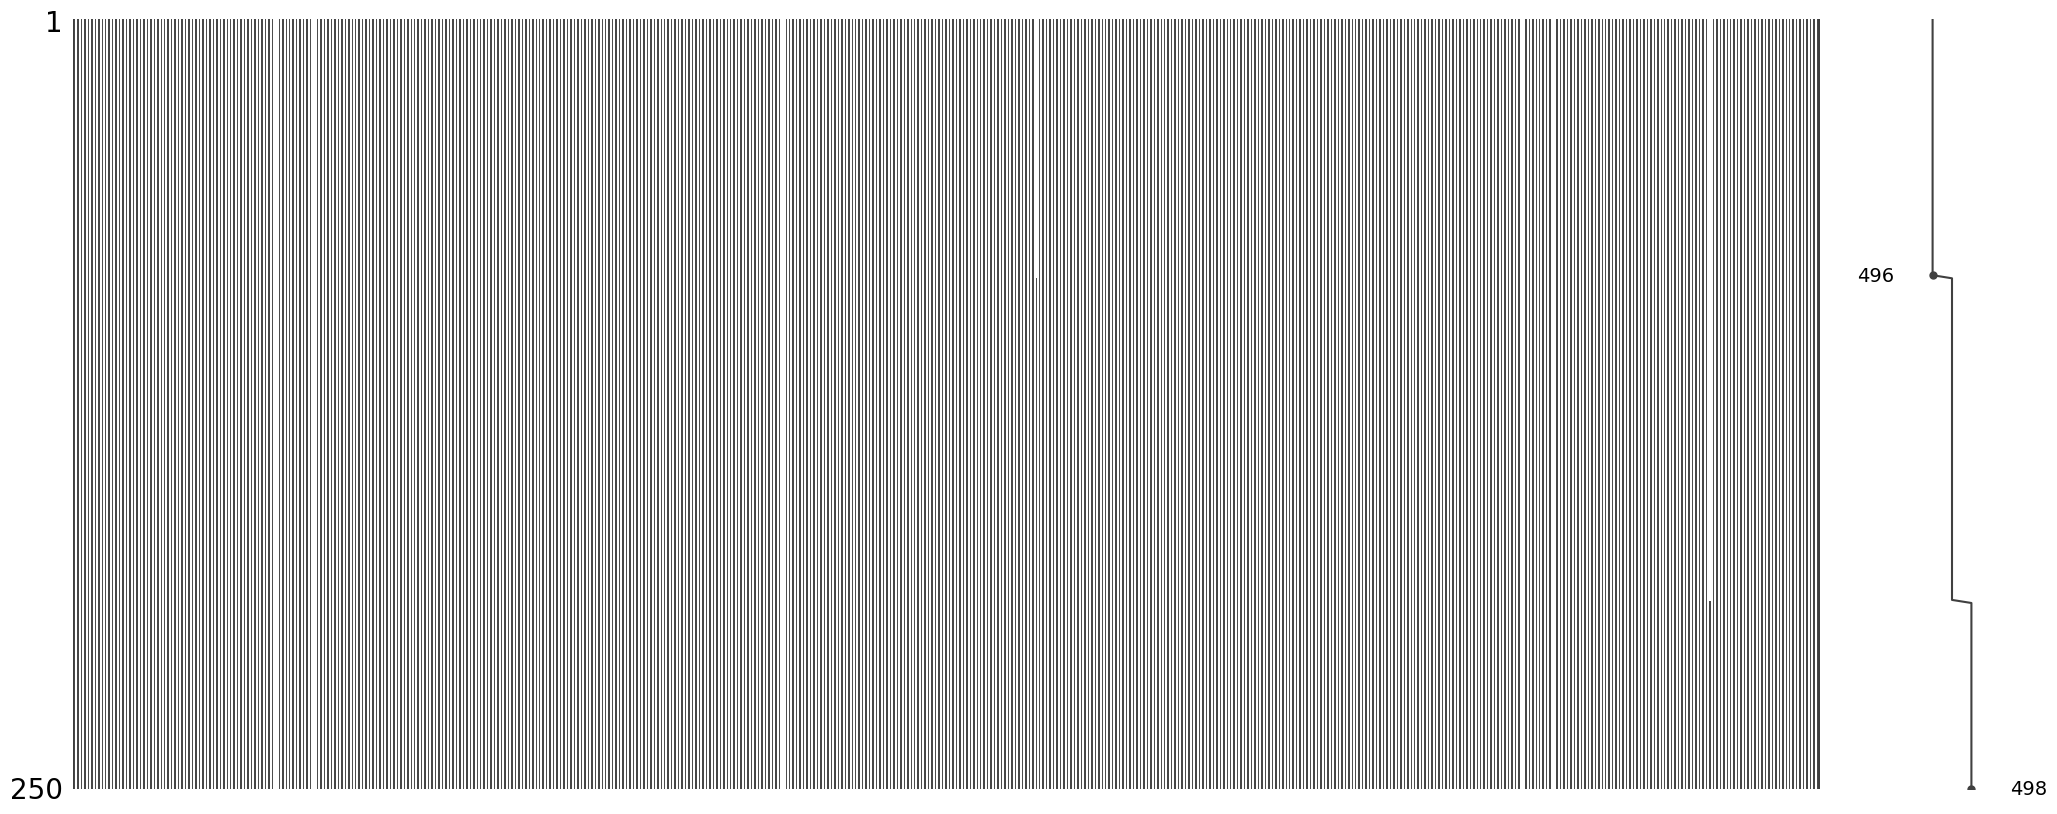

In [51]:
import missingno as mso

mso.matrix(data)

Remove all assets that have any `NaN` data.

In [52]:
data = data.dropna(axis=1, how="any")
data.shape

(250, 496)

## Random Asset Selection


Our goal is to create one portfolio of 5 randomly selected assets from those we downloaded and compare its performance with the S&P 500.

To do this, we will use the `Numpy` library and its random number generation capabilities.

Refs.:
* Random Generator: https://numpy.org/doc/stable/reference/random/generator.html

**NOTE**: Be cautious, the method for generating random numbers in Numpy has recently changed, and ChatGPT tends to generate code in the old format...


In [53]:
import numpy as np


def seleccionar_activos(lista_activos: np.ndarray, num_activos: int, replace=False, random_seed:int=None) -> np.ndarray:
    """Selecciona aleatoriamente un número dado de activos de una lista de activos.

    Args:
        lista_activos (list): Lista de todos los activos.
        num_activos (int): Número de activos a seleccionar aleatoriamente.
        replace (bool): Indica si se pueden seleccionar elementos repetidos.
        random_seed (int): Semilla para el generador de números aleatorios.

    Returns:
        list: Lista de activos seleccionados
    """
    # Creamos el generador de números aleatorios.
    # Si fijamos la semilla, obtendremos siempre los mismos resultados
    rng = np.random.default_rng(seed=random_seed)

    # Seleccionamos aleatoriamente los activos siguiendo una distribución uniforme.
    # replace = True -> podemos seleccionar el mismo elemento más de una vez.
    # replace = False -> no podemos seleccionar el mismo elemento más de una vez.
    activos_seleccionados = rng.choice(lista_activos, size=num_activos, replace=replace)

    # Devolvemos la lista de activos seleccionados.
    return activos_seleccionados


activos_seleccionados = seleccionar_activos([1, 2, 3, 4, 5], 3)
activos_seleccionados

array([3, 1, 4])

Select the assets that will be part of our portfolio.

In [54]:
num_activos = 5
activos_seleccionados = seleccionar_activos(
    lista_activos=data.columns.values,
    num_activos=num_activos,
    replace=False,
    random_seed=42
)
activos_seleccionados

array(['PRU', 'HBAN', 'MSI', 'AVB', 'GWW'], dtype=object)

Now we need to assign the weight of each asset in our portfolio. For simplicity, we will use an equal-weighted portfolio, meaning each asset will have the same weight.


In [55]:
# Calculamos el porcentaje de nuestro patrimonio que asignaremos a cada activo.
w = [1 / num_activos] * num_activos
w

[0.2, 0.2, 0.2, 0.2, 0.2]

Observe the difference between this:

```python
[1 / num_assets] * num_assets
```
and this

```python
np.multiply([1 / num_assets], num_assets)
```

In [56]:
[1 / num_activos] * num_activos

[0.2, 0.2, 0.2, 0.2, 0.2]

In [57]:
np.multiply([1 / num_activos], num_activos)

array([1.])

## Comparison of Our Portfolio with the S&P 500

At this point, we have:
* Prices of the S&P 500 index.
* Prices of the S&P 500 components.
* A method for randomly selecting assets.
* Selected assets for our portfolio.
* Assigned weights to our assets.

What do we need to do next?
1. Calculate the logarithmic returns of the S&P 500.
2. Calculate the logarithmic returns of the S&P 500 components.
3. Select the returns of the assets that will form our portfolio.
4. Calculate the historical return of our portfolio.
5. Compare the historical return of our portfolio with that of the S&P 500.
6. Calculate the expected annualized return of our portfolio and the S&P 500.
7. Calculate the annualized volatility of our portfolio and the S&P 500.
8. Compare the expected return and volatility of our portfolio with those of the S&P 500.

1. Calculate the logarithmic returns of the S&P 500.

In [58]:
# TODO: Ejercicio.

In [59]:
sp500_ret = np.log(sp500).diff().dropna()

2. Calculate the logarithmic returns of the S&P 500 components.

In [60]:
# TODO: Ejercicio.

In [61]:
data_ret = np.log(data).diff().dropna()

3. Select the returns of the assets that will form our portfolio.

In [62]:
# TODO: Ejercicio.

In [63]:
activos_seleccionados_ret = data_ret.loc[:, activos_seleccionados]
print(activos_seleccionados_ret.shape)

(249, 5)


4. Calculate the historical return of our portfolio.

In [64]:
# TODO: Ejercicio.

In [65]:
# (251, 5) · (5, 1) = (251, 1)
portfolio_ret = activos_seleccionados_ret @ w
portfolio_ret

Date
2023-01-04    0.010302
2023-01-05   -0.021044
2023-01-06    0.027172
2023-01-09   -0.010262
2023-01-10    0.007251
                ...   
2023-12-22    0.002072
2023-12-26    0.004273
2023-12-27    0.002002
2023-12-28    0.002215
2023-12-29   -0.003258
Length: 249, dtype: float64

5. Compare the historical return of our portfolio with that of the S&P 500.

In [66]:
# TODO: Ejercicio.

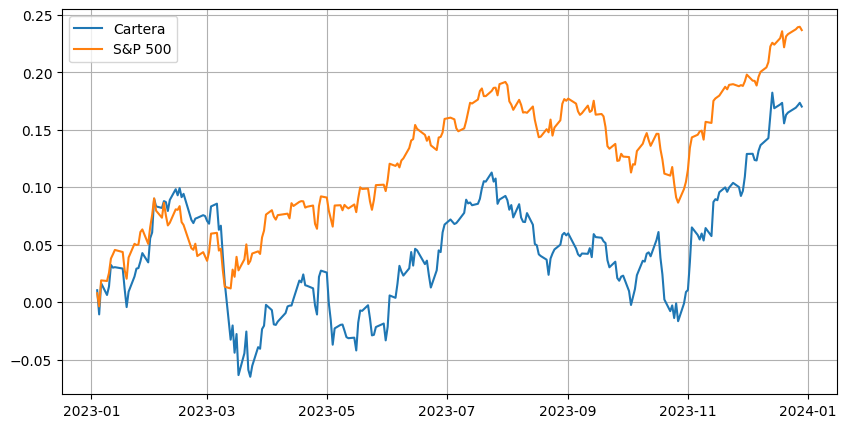

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(portfolio_ret.cumsum(), label="Cartera")
plt.plot(sp500_ret.cumsum(), label="S&P 500")
plt.grid(True)
plt.legend()
plt.show()

6. Calculate the expected annualized return of our portfolio and the S&P 500.


In [68]:
# TODO: Ejercicio.

In [69]:
portfolio_ret_annualized = portfolio_ret.mean() * 252
sp500_ret_annualized = sp500_ret.mean() * 252

7. Calculate the annualized volatility of our portfolio and the S&P 500.


In [70]:
# TODO: Ejercicio.

In [71]:
portfolio_std_annualized = portfolio_ret.std() * np.sqrt(252)
sp500_std_annualized = sp500_ret.std() * np.sqrt(252)

8. Compare the expected return and volatility of our portfolio with those of the S&P 500 using a risk-return plot.

In [72]:
# TODO: Ejercicio.

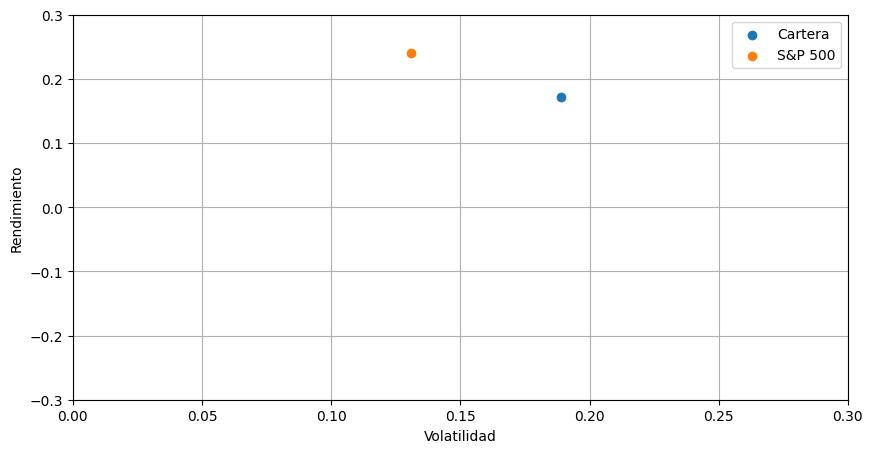

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(portfolio_std_annualized, portfolio_ret_annualized, label="Cartera")
plt.scatter(sp500_std_annualized, sp500_ret_annualized, label="S&P 500")
plt.xlabel("Volatilidad")
plt.ylabel("Rendimiento")
plt.xlim(0, 0.3)
plt.ylim(-0.3, 0.3)
plt.grid(True)
plt.legend()
plt.show()

## Random Generation of 10,000 Equal-Weighted Portfolios

In this section, we will randomly generate 10,000 portfolios, each with equal weights assigned to their selected assets. This large number of portfolios allows us to explore a wide range of potential outcomes and provides a basis for identifying efficient portfolios in terms of return and risk.

The process involves:
1. Randomly selecting assets for each portfolio.
2. Assigning equal weights to each asset in the portfolio.
3. Calculating the return and volatility for each generated portfolio.

This approach helps us analyze the performance characteristics of a large sample of portfolios and visualize the distribution of possible outcomes.


Previously, we randomly selected 5 assets from all available options.


In [74]:
num_activos = 5
activos_seleccionados = seleccionar_activos(
    lista_activos=data.columns.values,
    num_activos=num_activos,
    replace=True,
    random_seed=42,
)
print(activos_seleccionados.shape)
print(activos_seleccionados)

(5,)
['AVGO' 'PSX' 'MTB' 'HBAN' 'GWW']


Now, we ask it to generate 100,000 combinations of 5 elements, meaning 100,000 portfolios of 5 randomly selected assets with replacement.


In [101]:
num_activos = (10000, 5)  # 10000 carteras, 5 activos por cartera
activos_seleccionados = seleccionar_activos(
    lista_activos=data.columns.values,
    num_activos=num_activos,
    replace=True,
    random_seed=42
)
activos_seleccionados.shape

(10000, 5)

We calculate the expected annualized returns and annualized volatilities of each generated portfolio.


In [76]:
# Número de activos por cartera.
n = activos_seleccionados.shape[1]

# Lista que guardará los retornos esperados anualizados.
retornos_p = []
# Lista que guardará las volatilidades anualizadas.
volatilidades_p = []

# Inicializamos listas para acumulación en bloque.
portfolio_returns_list = []

for idx in range(len(activos_seleccionados)):
    # Obtenemos los rendimientos de los activos seleccionados.
    activos_ret = data_ret.loc[:, activos_seleccionados[idx]]  # (251, 5)

    # Calculamos los pesos de los activos en la cartera.
    w = [1 / n] * n  # (5, )

    # Calculamos la rentabilidad de nuestra cartera y añadimos a la lista.
    portfolio_returns_list.append(activos_ret @ w)

    # Calculamos rendimiento esperado anualizado.
    portfolio_ret_annualized = portfolio_returns_list[-1].mean() * 252
    retornos_p.append(portfolio_ret_annualized)

    # Calculamos la volatilidad anualizada.
    portfolio_std_annualized = portfolio_returns_list[-1].std() * np.sqrt(252)
    volatilidades_p.append(portfolio_std_annualized)

# Convertimos la lista de retornos de carteras en un DataFrame de una sola vez
portfolio_ret_df = pd.DataFrame(portfolio_returns_list).T
portfolio_ret_df.columns = [f"Portfolio_{idx}" for idx in range(len(activos_seleccionados))]


<Figure size 640x480 with 0 Axes>

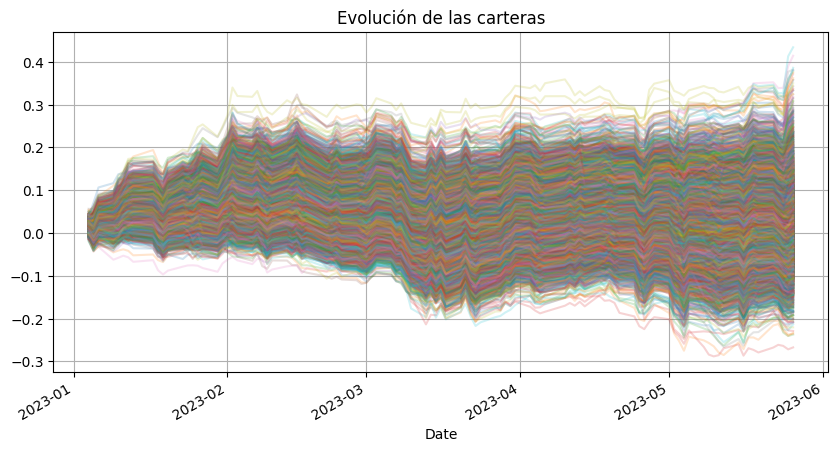

In [77]:
plt.figure()
portfolio_ret_df[:100].cumsum().plot(legend=False, alpha=0.2, figsize=(10, 5))
plt.grid(True)
plt.title("Evolución de las carteras")
plt.show()

In [78]:
print(f"Número de retornos = {len(retornos_p)}")
print(f"Número de volatilidades = {len(volatilidades_p)}")

Número de retornos = 10000
Número de volatilidades = 10000


We calculate the expected annualized returns and annualized volatilities of each asset individually.


In [79]:
retornos_a = data_ret.mean() * 252
volatilidades_a = data_ret.std() * np.sqrt(252)

Finally, we plot all points on the return/risk axes.


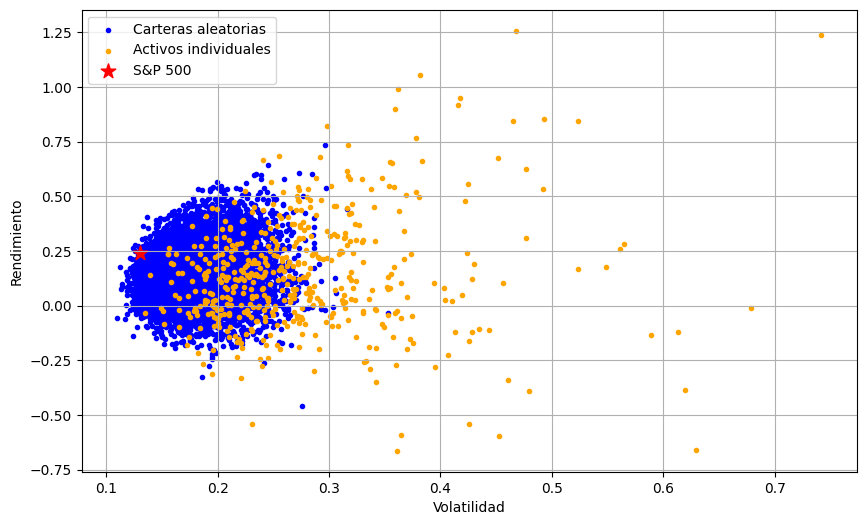

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(volatilidades_p, retornos_p, color="blue", marker=".",label="Carteras aleatorias")
plt.scatter(volatilidades_a, retornos_a, color="orange", marker=".", label="Activos individuales")
plt.scatter(sp500_std_annualized, sp500_ret_annualized, color="red", marker="*", s=120, label="S&P 500")
plt.xlabel("Volatilidad")
plt.ylabel("Rendimiento")
plt.legend()
plt.grid(True)
plt.show()

## Random Weight Allocation

### Exercise: Portfolio Simulation and Comparison with the S&P 500

1. **Select 5 Assets**: Randomly select 5 assets from the available data to form the base of your portfolios.
2. **Generate 10,000 Random Portfolios**: For each portfolio, assign random weights to the selected assets.
3. **Calculate Portfolio Returns**: Compute the daily returns for each portfolio and then calculate the cumulative returns over time.
4. **Compare Cumulative Returns**: Plot and compare the cumulative returns of the 10,000 portfolios with both the S&P 500 and an equal-weighted portfolio of the 5 selected assets.
5. **Risk-Return Plot**: Calculate the annualized returns and volatilities for each portfolio, then plot them on a risk-return scatter plot to visualize the distribution.

This exercise will help you understand the impact of different weightings on portfolio performance and evaluate how various portfolios compare to the S&P 500 in terms of risk and return.


In [81]:
num_activos = 5
activos_seleccionados = seleccionar_activos(
    lista_activos=data.columns.values,
    num_activos=num_activos,
    replace=False,
    random_seed=42
)
activos_seleccionados

array(['PRU', 'HBAN', 'MSI', 'AVB', 'GWW'], dtype=object)

In [82]:
ret_assets = data_ret.loc[:, activos_seleccionados]

ret_assets.shape


(249, 5)

In [83]:
rng = np.random.default_rng(seed=42)

# Generate random weights for 10,000 portfolios with 5 assets
weights = rng.uniform(size=(10000, 5))

# Normalize each row so that weights for each portfolio sum to 1
weights = weights / weights.sum(axis=1)[:, np.newaxis]

**np.newaxis** is used to adjust the dimensions of the array so that the sum of weights along each row (i.e., for each portfolio) divides correctly across all columns.

Explanation of np.newaxis:

* weights.sum(axis=1) calculates the sum of weights for each row (each portfolio), resulting in a 1D array of shape (10000,).
  
* To divide each element in weights by its corresponding row sum, we need weights.sum(axis=1) to match the dimensions of weights for broadcasting.
  
* [:, np.newaxis] adds an extra dimension to the array, changing its shape from (10000,) to (10000, 1).
  
This allows each element in a row of weights to be divided by the row’s total sum, ensuring that each row in weights sums to 1. Without np.newaxis, broadcasting would not work correctly for this operation.

In [84]:
ret_portfolios = ret_assets @ weights.T

In [85]:
ret_portfolios.shape

(249, 10000)

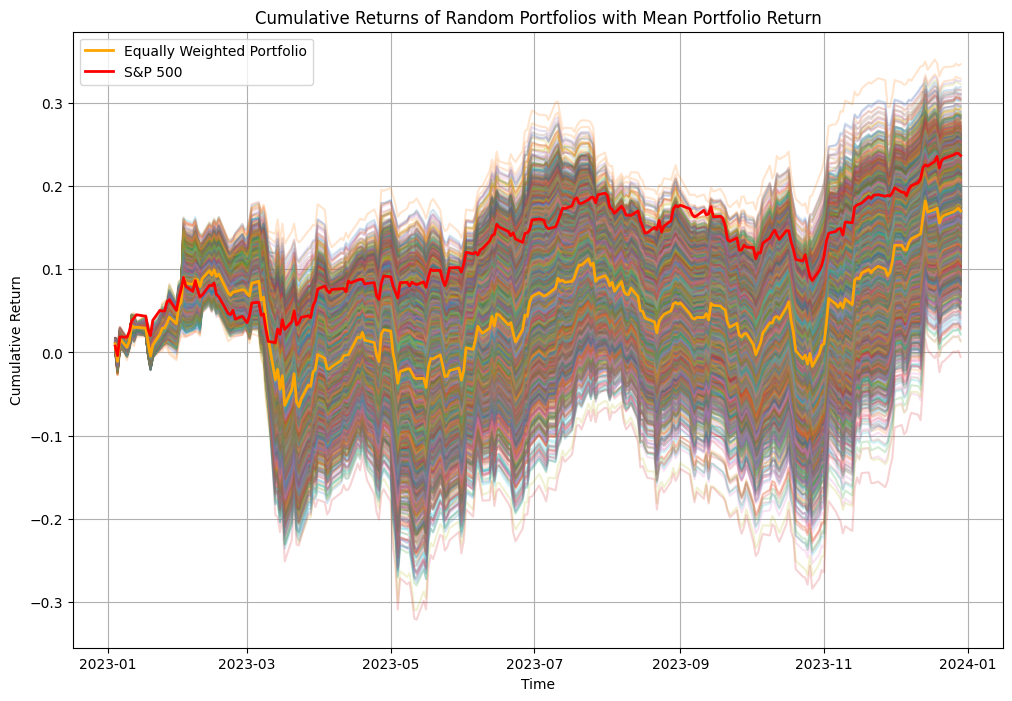

In [86]:
plt.figure(figsize=(12, 8))

# Plot cumulative returns of each portfolio with transparency
plt.plot(ret_portfolios.cumsum(axis=0), alpha=0.2)


# Calculate and plot the cumulative return of the equally weighted portfolio
equal_weights = np.ones(num_activos)/num_activos  # Equal weights for all assets
equal_weighted_return = (ret_assets @ equal_weights)
equal_weighted_return_acum = equal_weighted_return.cumsum()  # Dot product for equally weighted return
plt.plot(equal_weighted_return_acum, color="orange", linewidth=2, label="Equally Weighted Portfolio")

# Plot the cumulative return of the S&P 500
plt.plot(sp500_ret.cumsum(),  color="red", linewidth=2, label="S&P 500")

plt.legend()
plt.xlabel("Time")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Returns of Random Portfolios with Mean Portfolio Return")
plt.grid(True)
plt.show()



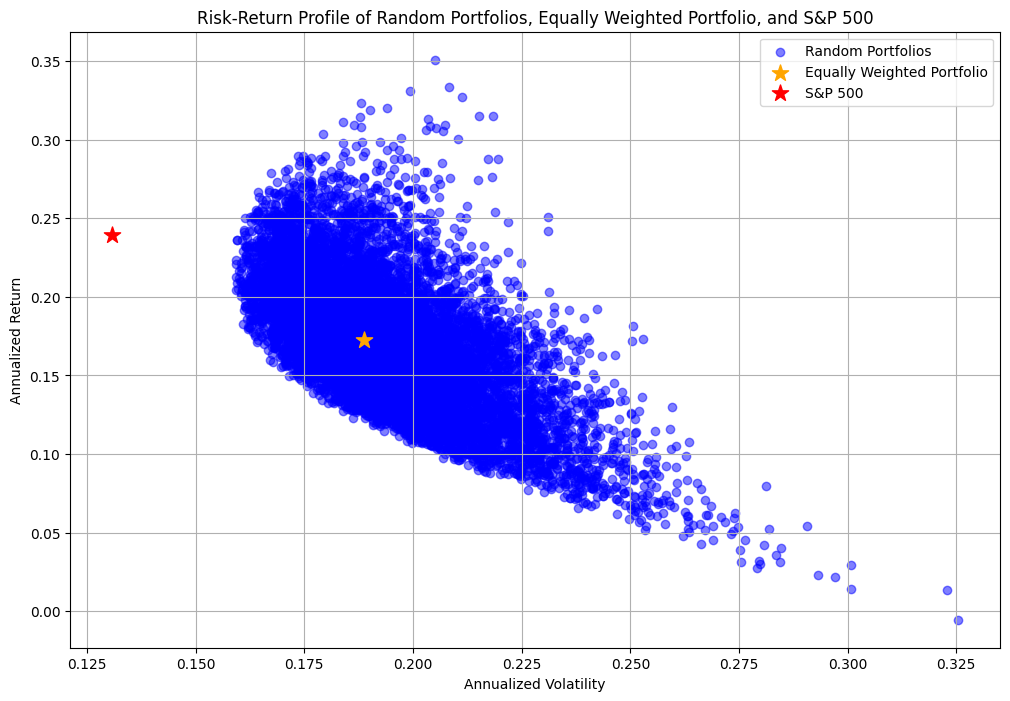

In [87]:

# Calculate annualized returns and volatilities for each portfolio
annualized_returns = ret_portfolios.mean(axis=0) * 252  # Assuming 252 trading days
annualized_volatilities = ret_portfolios.std(axis=0) * np.sqrt(252)

# Calculate the annualized return and volatility of the equally weighted portfolio
equal_weighted_annual_return = equal_weighted_return.mean() * 252
equal_weighted_annual_volatility = equal_weighted_return.std() * np.sqrt(252)

# Calculate the annualized return and volatility for the S&P 500
sp500_annual_return = sp500_ret.mean() * 252
sp500_annual_volatility = sp500_ret.std() * np.sqrt(252)

# Scatter plot of the portfolios
plt.figure(figsize=(12, 8))
plt.scatter(annualized_volatilities, annualized_returns, color="blue", alpha=0.5, label="Random Portfolios")

# Plot the equally weighted portfolio point
plt.scatter(equal_weighted_annual_volatility, equal_weighted_annual_return, color="orange", marker="*", s=150, label="Equally Weighted Portfolio")

# Plot the S&P 500 point
plt.scatter(sp500_annual_volatility, sp500_annual_return, color="red", marker="*", s=150, label="S&P 500")

# Labels and title
plt.xlabel("Annualized Volatility")
plt.ylabel("Annualized Return")
plt.title("Risk-Return Profile of Random Portfolios, Equally Weighted Portfolio, and S&P 500")
plt.legend()
plt.grid(True)
plt.show()


## Monte Carlo Simulation

So far, we have:

1. Constructed portfolios randomly from a set of assets and analyzed their returns and volatilities.
2. Compared the return and volatility of a random portfolio with its benchmark index.
3. Compared random portfolios with the individual assets they are composed of.

In summary, we have studied the past and compared it with other assets. Now, we will study probable futures and compare against ourselves.

The Monte Carlo method is based on generating a large number of possible scenarios to obtain a distribution of potential future outcomes. In our case, we aim to analyze how our portfolio’s return (price) might evolve.

To do this:

1. We will assume that returns follow a normal distribution.
2. We will need to know the expected return.
3. We will need to know the volatility.
4. We will generate many random scenarios.
5. We will analyze the results.


We calculate the necessary data for our portfolio, including: expected return and volatility

In [88]:
# Generamos la cartera.
num_activos = 5
activos_seleccionados = seleccionar_activos(
    lista_activos=data.columns.values,
    num_activos=num_activos,
    replace=False,
    random_seed=42
)

# Calculamos el porcentaje de nuestro patrimonio que asignaremos a cada activo.
w = [1 / num_activos] * num_activos

# Obtenemos los rendimientos de los activos seleccionados.
activos_seleccionados_ret = data_ret.loc[:, activos_seleccionados]

# Calculamos el retorno de nuestra cartera.
portfolio_ret = activos_seleccionados_ret @ w

# Calculamos retorno esperado (SIN ANUALIZAR).
expected_portfolio_ret = portfolio_ret.mean()

# Calculamos volatilidad (SIN ANUALIZAR).
expected_portfolio_std = portfolio_ret.std()

We plot the performance of our portfolio up to the current date.

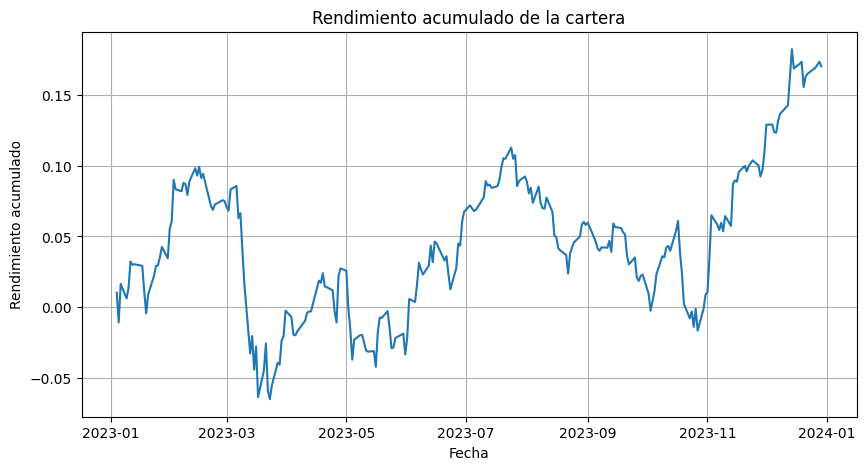

Rentabilidad media diaria = 0.0006834595570311866
Rentabilidad anualizada esperada = 0.172231808371859
Volatilidad = 0.011894740460454087
Volatilidad anualizada = 0.1888231510081166


In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(portfolio_ret.cumsum())
plt.title("Rendimiento acumulado de la cartera")
plt.xlabel("Fecha")
plt.ylabel("Rendimiento acumulado")
plt.grid(True)
plt.show()

print(f"Rentabilidad media diaria = {expected_portfolio_ret}")
print(f"Rentabilidad anualizada esperada = {expected_portfolio_ret * 252}")
print(f"Volatilidad = {expected_portfolio_std}")
print(f"Volatilidad anualizada = {expected_portfolio_std * np.sqrt(252)}")

We generate future returns using a normal distribution with the same mean and standard deviation as our historical portfolio returns.

In [90]:
import numpy as np

# Creamos el generador de números aleatorios.
rng = np.random.default_rng(seed=42)

# Generamos "num_escenarios" escenarios de "num_dias" rendimientos futuros (1 por día) siguiendo una distribución normal: recordad que las fechas van en las filas.
num_escenarios = 100
num_dias = 252
future_returns = rng.normal(
    loc=expected_portfolio_ret,
    scale=expected_portfolio_std,
    size=(num_dias, num_escenarios),  # "num_dias" días, "num_escenarios" escenarios
)
future_returns.shape

(252, 100)

What does our portfolio returns DataFrame look like up to today?


In [91]:
portfolio_ret

Date
2023-01-04    0.010302
2023-01-05   -0.021044
2023-01-06    0.027172
2023-01-09   -0.010262
2023-01-10    0.007251
                ...   
2023-12-22    0.002072
2023-12-26    0.004273
2023-12-27    0.002002
2023-12-28    0.002215
2023-12-29   -0.003258
Length: 249, dtype: float64

How do we create a DataFrame with an index containing the dates we need (those that follow the last day in our current DataFrame)?


Ref.:
* Función ``bdate_range`` de Pandas: https://pandas.pydata.org/docs/reference/api/pandas.bdate_range.html

In [92]:
import pandas as pd

future_returns_df = pd.DataFrame(
    data=future_returns,
    index=pd.bdate_range(start="2023-12-30", periods=num_dias)
)
future_returns_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2024-01-01,0.004308,-0.011687,0.009610,0.011871,-0.022524,-0.014806,0.002204,-0.003078,0.000484,-0.009463,...,0.008598,-0.000488,-0.004352,-0.000265,-0.019387,-0.016530,-0.015050,-0.011179,0.005439,-0.010087
2024-01-02,-0.003815,0.016137,-0.003554,0.009456,-0.010422,-0.001760,-0.010617,-0.003349,0.010679,-0.019863,...,0.021186,-0.001452,-0.003874,0.018067,-0.012485,-0.009959,0.008336,-0.004010,0.000623,-0.001261
2024-01-03,0.004699,0.017425,0.001761,0.008343,-0.023703,0.000104,-0.009347,-0.013814,-0.009762,-0.003291,...,-0.002314,0.002498,0.018186,-0.029846,-0.002134,0.002783,0.004204,-0.003740,-0.020212,0.004585
2024-01-04,0.021230,-0.017561,0.010958,-0.003224,-0.000046,-0.011840,-0.003295,0.016147,0.007614,0.021289,...,-0.026795,0.001330,-0.004928,0.006148,0.009033,0.002328,0.009725,0.003410,0.006988,-0.007698
2024-01-05,-0.001453,0.003024,0.010443,-0.004000,0.006883,-0.002479,-0.000715,0.010550,-0.023023,-0.014738,...,0.013593,0.005043,-0.002721,0.006083,-0.002988,0.011812,-0.021101,-0.003309,-0.022997,-0.017100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-11,0.003041,0.028643,-0.009346,-0.010839,-0.003212,0.021390,-0.006178,0.005802,0.013423,0.009949,...,0.009800,0.001788,-0.007759,0.002817,0.000013,0.017526,-0.005441,-0.005997,-0.007627,0.023246
2024-12-12,-0.006961,0.016109,-0.011585,0.006710,0.003806,0.015354,0.013629,0.001658,-0.005705,0.020012,...,0.000600,0.004360,-0.011141,0.009964,0.010750,-0.003542,0.005882,-0.019734,0.002825,-0.000900
2024-12-13,0.015662,-0.001679,0.011016,-0.003969,-0.026509,-0.001999,0.003024,0.002478,0.002657,-0.005341,...,0.002623,0.004480,0.001586,-0.006833,-0.001819,0.014732,-0.004367,0.000938,-0.005939,0.012821
2024-12-16,0.001609,-0.008404,0.000768,-0.002184,0.017248,0.000152,-0.015764,0.006615,0.021929,0.014921,...,-0.007935,-0.012909,-0.007026,-0.016821,0.003158,0.014762,0.017592,-0.012274,0.010042,0.001689


And now, let’s plot everything together...


In [93]:
# Calcula el retorno acumulado del primer DataFrame
cumulative_portfolio_ret = portfolio_ret.cumsum()

# Último valor acumulado de los retornos históricos
last_historical_value = cumulative_portfolio_ret.iloc[-1]

# Calcula el retorno acumulado para cada simulación en el segundo DataFrame
cumulative_future_returns = last_historical_value + future_returns_df.cumsum()



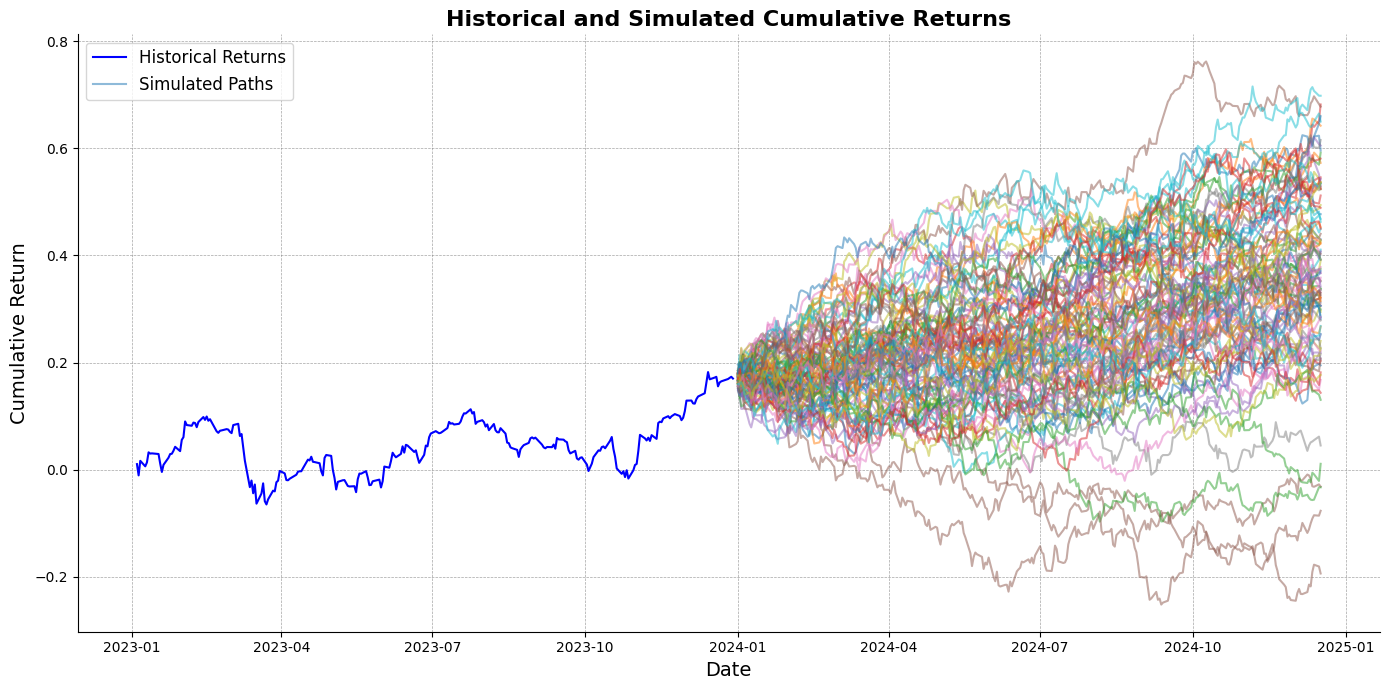

In [94]:
plt.figure(figsize=(14, 7))
plt.plot(cumulative_portfolio_ret, label="Histórico", color="blue")
plt.plot(cumulative_future_returns,  alpha=0.5)

# Mejoras visuales
plt.title("Historical and Simulated Cumulative Returns", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Cumulative Return", fontsize=14)
plt.legend(["Historical Returns", "Simulated Paths"], fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

plt.show()

What is the distribution of the results like?


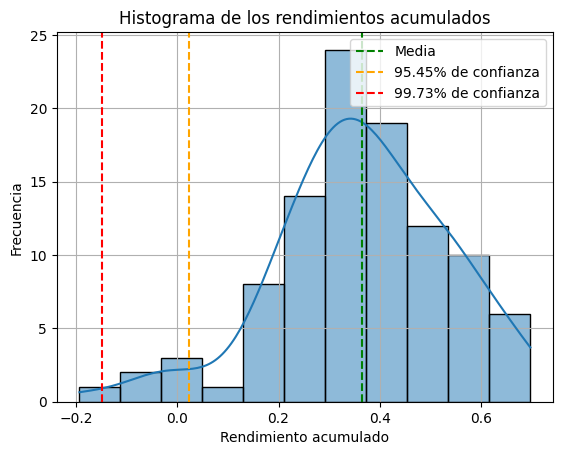

In [95]:
import seaborn as sns

serie = last_historical_value + future_returns_df.sum()

sns.histplot(serie, kde=True)
# Media
plt.axvline(serie.mean(), color="green", linestyle="--", label="Media")
# 100% - 95.45% de los datos
plt.axvline(serie.mean() - 2 * serie.std(), color="orange", linestyle="--", label="95.45% de confianza")
# 100% - 99.73% de los datos
plt.axvline(serie.mean() - 3 * serie.std(), color="red", linestyle="--", label="99.73% de confianza")

plt.xlabel("Rendimiento acumulado")
plt.ylabel("Frecuencia")
plt.title("Histograma de los rendimientos acumulados")
plt.grid(True)
plt.legend()
plt.show()

With a 95% confidence level, the scenarios are as follows:

1. **Central Scenario**: The expected value or mean of the distribution, representing the most typical outcome.
2. **Best Scenario**: The upper bound of the confidence interval, calculated as the mean plus 2 standard deviations. This represents an optimistic outcome within the 95.45% confidence range.
3. **Worst Scenario**: The lower bound of the confidence interval, calculated as the mean minus 2 standard deviations. This represents a pessimistic outcome within the 95.45% confidence range.

These scenarios provide a range of likely outcomes, helping to estimate potential risk and return with reasonable certainty.


Ref.:
* Función ``quantile`` de Numpy: https://numpy.org/devdocs/reference/generated/numpy.quantile.html

In [96]:
np.quantile(serie, 1 - 0.95, method="closest_observation")

np.float64(0.010840970717083454)

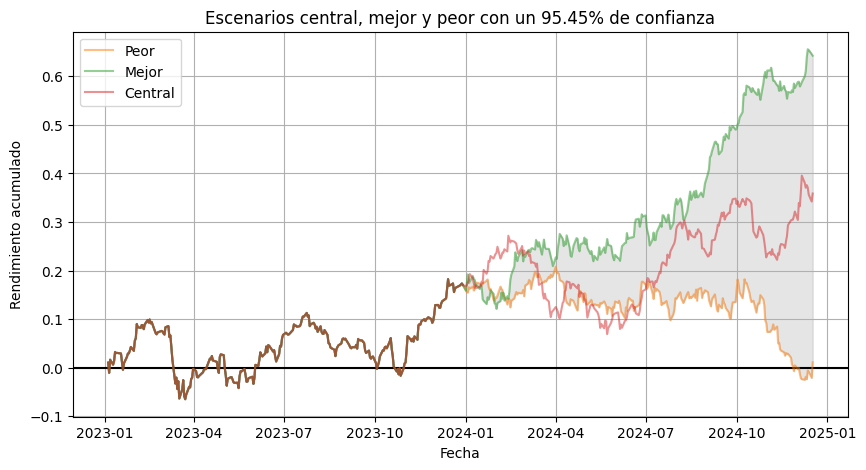

In [97]:
# Índices de los escenarios mejor, peor y central.
escenario_peor = serie[serie == np.quantile(serie, 1 - 0.95, method="closest_observation")].index.values[0]
escenario_mejor = serie[serie == np.quantile(serie, 0.95, method="closest_observation")].index.values[0]
escenario_central = serie[serie == np.quantile(serie, 0.5, method="closest_observation")].index.values[0]

# Series de retornos acumulados de los escenarios.
peor_cumsum = pd.concat([portfolio_ret, future_returns_df[escenario_peor]]).cumsum()
mejor_cumsum = pd.concat([portfolio_ret, future_returns_df[escenario_mejor]]).cumsum()
central_cumsum = pd.concat([portfolio_ret, future_returns_df[escenario_central]]).cumsum()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Serie conocida (pasado).
plt.plot(portfolio_ret.cumsum())

# Línea horizontal en 0.
plt.axhline(0, color="black")

# Escenarios futuros.
plt.plot(peor_cumsum, alpha=0.5, label="Peor")
plt.plot(mejor_cumsum, alpha=0.5, label="Mejor")
plt.plot(central_cumsum, alpha=0.5, label="Central")

# Relleno entre las series.
plt.fill_between(peor_cumsum.index, peor_cumsum, mejor_cumsum, color="gray", alpha=0.2)

# Configuración del gráfico.
plt.title("Escenarios central, mejor y peor con un 95.45% de confianza")
plt.xlabel("Fecha")
plt.ylabel("Rendimiento acumulado")
plt.grid(True)
plt.legend()
plt.show()